### Мобильная классификация цен 

Набор данных состоит из почти 2000 записей о характеристиках мобильных телефонов (объем оперативной памяти, размер и т.д.), технических характеристиках и т.д., а также их ценовом диапазоне. 

Импортируем необходимые библиотеки:

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot , plot 
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [70]:
df = pd.read_csv('train.csv')

In [71]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Описание данных
Признаки:
- battery_power – Общее количество энергии, которое батарея может накопить за один раз, измеряется в мАч.
- blue – Есть Bluetooth или нет.
- clock_speed – скорость, с которой микропроцессор выполняет команды.
- dual_sim – Поддерживает две sim-карты или нет.
- fc – Количество мегапикселей фронтальной камеры.
- four_g – Есть 4G или нет.
- int_memory – Объем встроенной памяти в гигабайтах.
- m_dep – Глубина камеры в сантиметрах.
- mobile_wt – Вес мобильного телефона.
- n_cores – Количество ядер процессора.
- pc - Мегапиксели основной камеры.
- px_height – Высота разрешения в пикселях.
- px_width – Ширина разрешения в пикселях.
- ram – Оперативная память в мегабайтах.
- sc_h – Высота экрана мобильного устройства в сантиметрах.
- sc_w – Ширина экрана мобильного устройства в сантиметрах.
- talk_time – Максимальное время, на которое хватит одной зарядки аккумулятора.
- three_g – Есть 3G или нет.
- touch_screen – Есть сенсорный экран или нет.
- wifi – Есть Wi-Fi или нет.
- price_range – Это целевая переменная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [72]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(2000, 21)

In [73]:
# выводим типы данных
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [74]:
# имена колонок в виде списка
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [75]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке battery_power = 0
Кол-во пропусков в колонке blue = 0
Кол-во пропусков в колонке clock_speed = 0
Кол-во пропусков в колонке dual_sim = 0
Кол-во пропусков в колонке fc = 0
Кол-во пропусков в колонке four_g = 0
Кол-во пропусков в колонке int_memory = 0
Кол-во пропусков в колонке m_dep = 0
Кол-во пропусков в колонке mobile_wt = 0
Кол-во пропусков в колонке n_cores = 0
Кол-во пропусков в колонке pc = 0
Кол-во пропусков в колонке px_height = 0
Кол-во пропусков в колонке px_width = 0
Кол-во пропусков в колонке ram = 0
Кол-во пропусков в колонке sc_h = 0
Кол-во пропусков в колонке sc_w = 0
Кол-во пропусков в колонке talk_time = 0
Кол-во пропусков в колонке three_g = 0
Кол-во пропусков в колонке touch_screen = 0
Кол-во пропусков в колонке wifi = 0
Кол-во пропусков в колонке price_range = 0


In [76]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [77]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Визуальный анализ

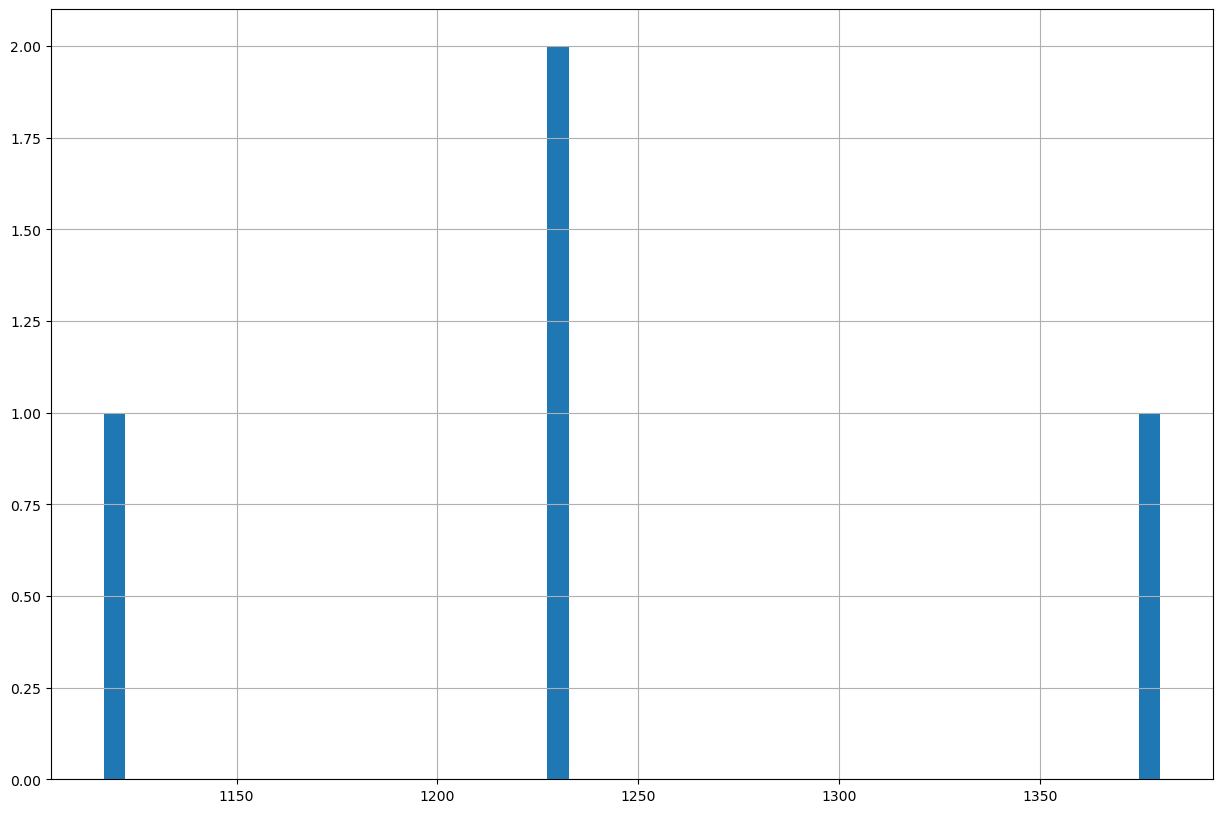

In [84]:
df.hist(figsize = (15,10), bins = 50);

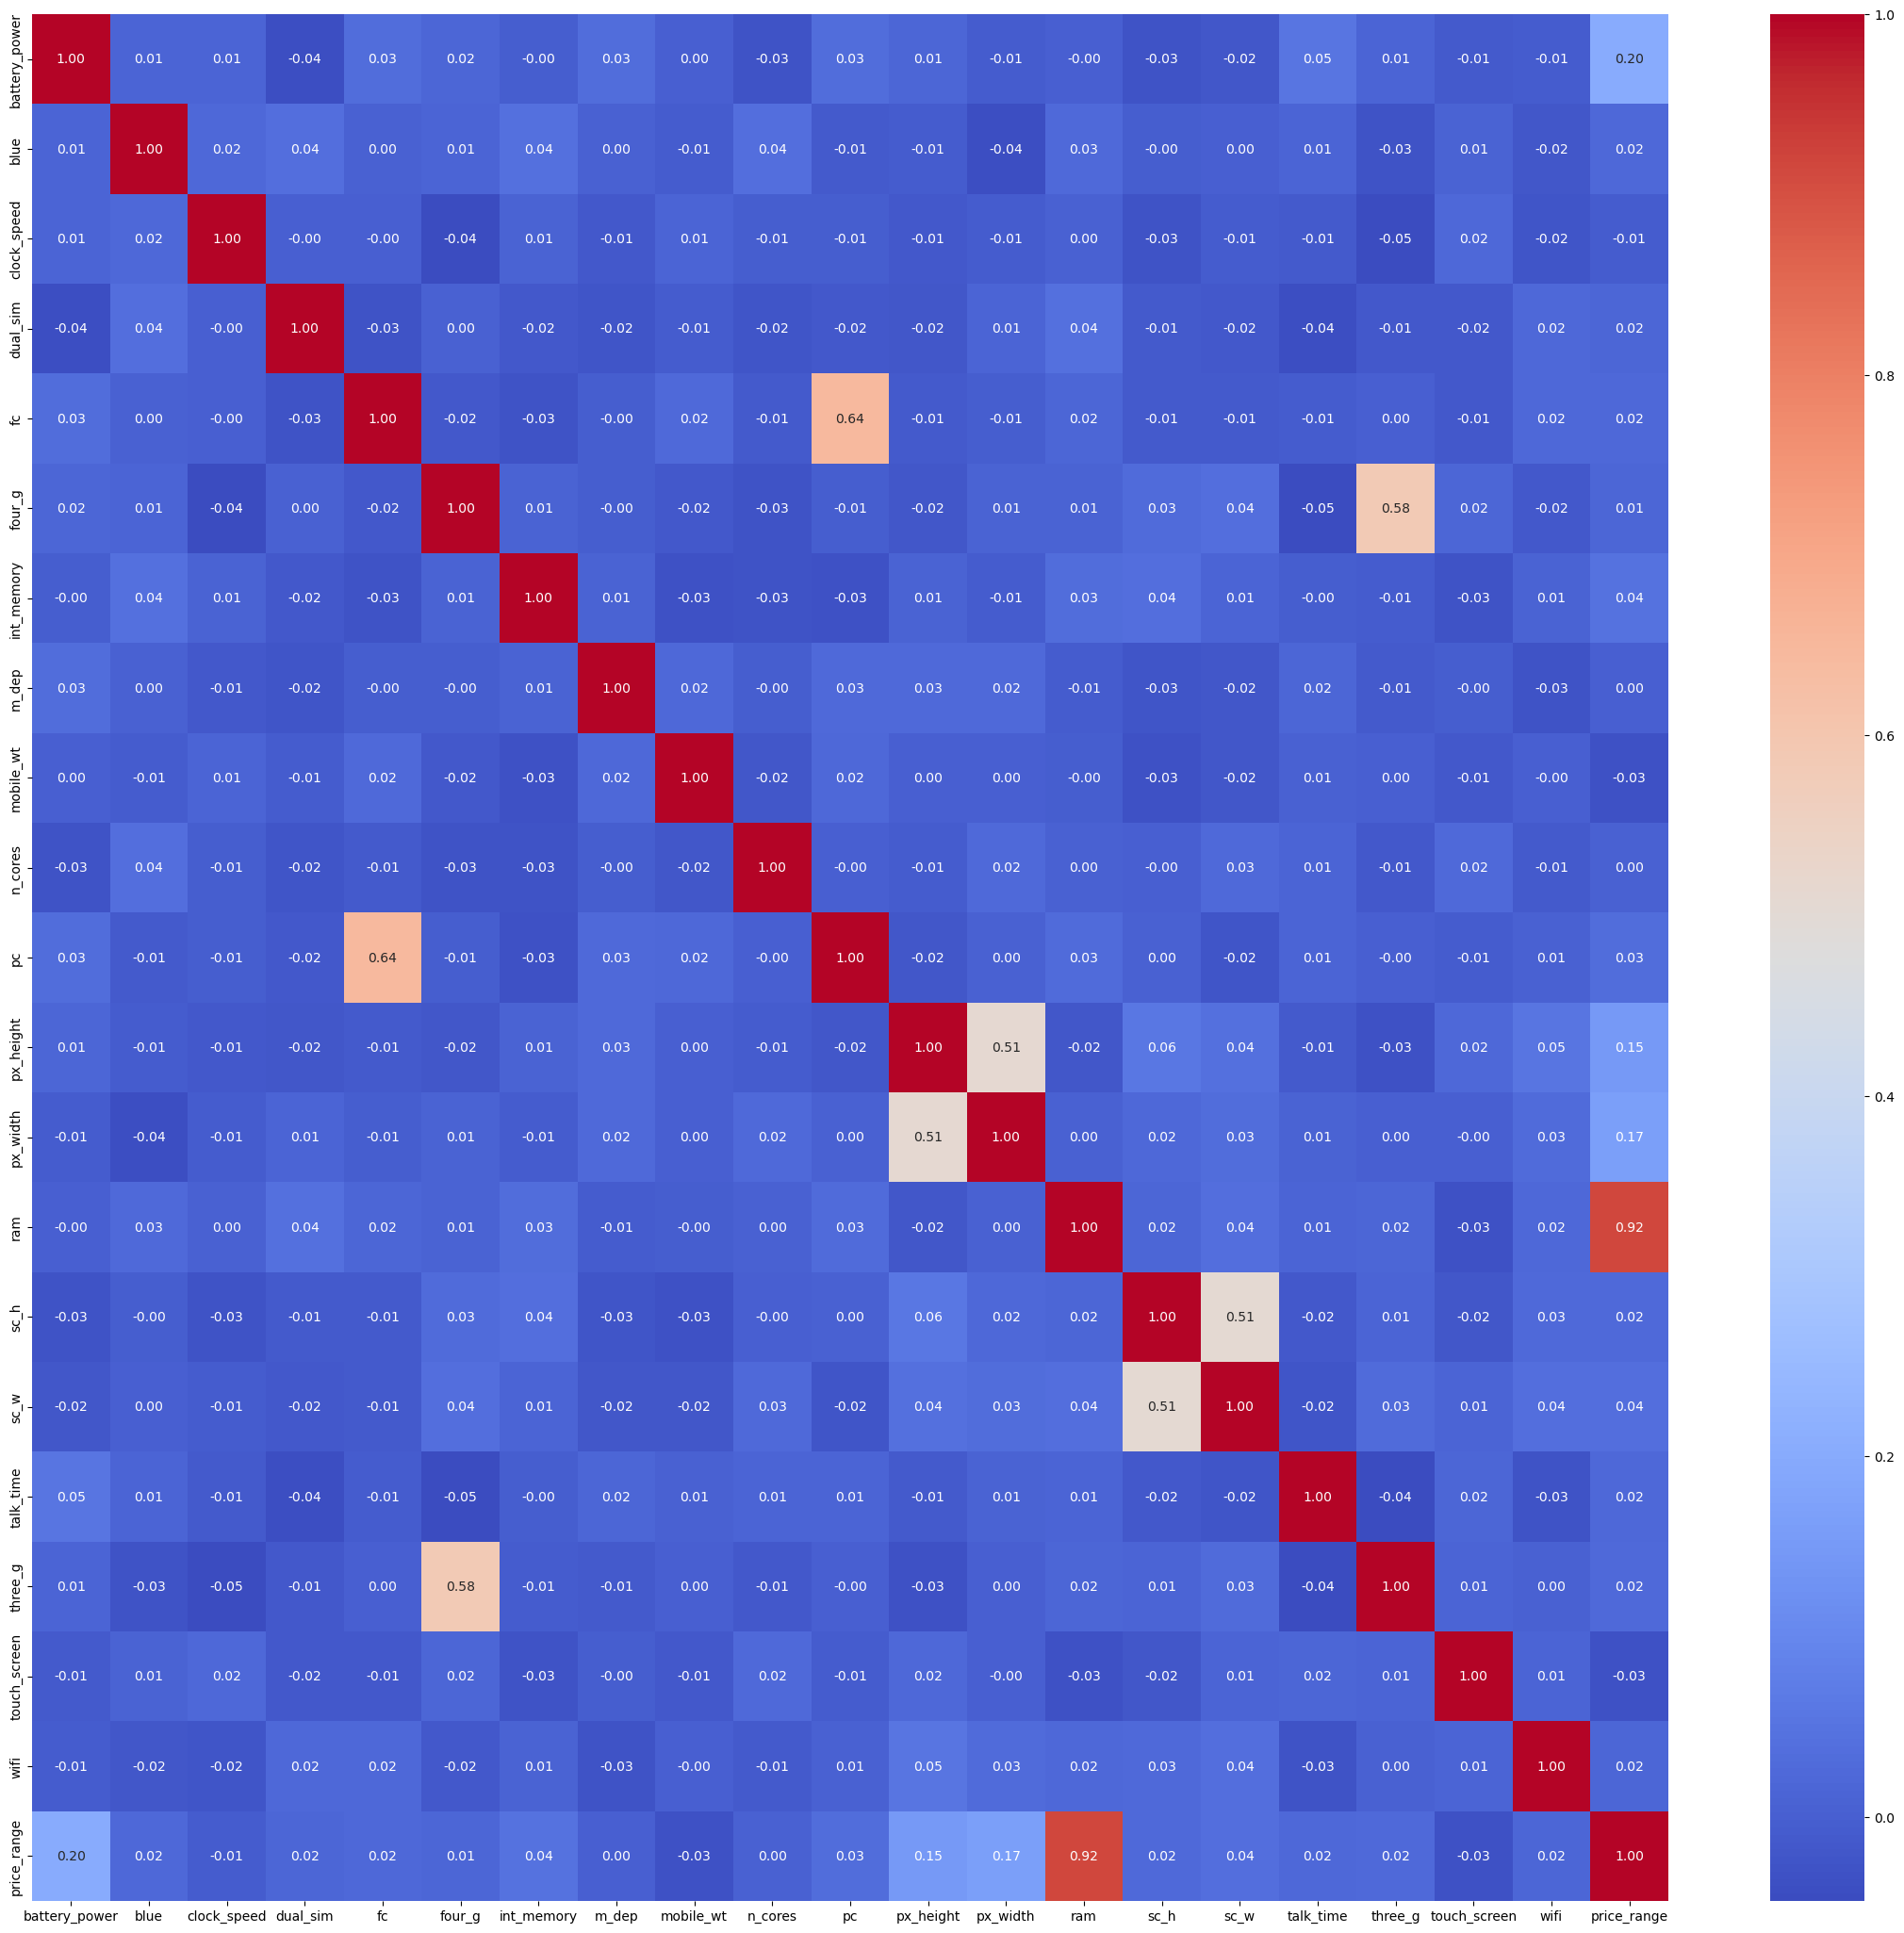

In [87]:
plt.figure(figsize=(28,26))
sns.heatmap(pd.DataFrame(df_train.corr()), annot = True, cmap='coolwarm', fmt='.2f');

### Формирование дата-сета для обучения моделей

In [92]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 
                  'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

In [104]:
X = pd.concat([df[features_names]], axis = 1)
X.shape

TypeError: 'FacetGrid' object is not subscriptable

In [103]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined